<a href="https://colab.research.google.com/github/ianuragbhatt/time-series-tutorials/blob/main/01_tsf_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and Explore Time Series Dataset
* We will use the Daily Female Births Dataset as an example. This dataset describes the number of daily female births in California in 1959.

## Load Time Series Data

In [ ]:
# load dataset using read_csv()
import pandas as pd
data_path = '/content/drive/MyDrive/data_science/datasets/time-series-tutorials/daily-total-female-births-CA.csv'
series = pd.read_csv(data_path, header=0, index_col=0, parse_dates=True,
    squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64


## Exploring Time Series Data

In [ ]:
# summarize first few lines of a file
print(series.head(10))

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: births, dtype: int64


### Number of Observations
* Running this example we can see that as we would expect, there are 365 observations, one for each day of the year in 1959

In [ ]:
# summarize the dimensions of a time series
print(series.size)

365


### Querying by Time
* You can slice, dice, and query your series using the time index. For example, you can access all observations in January as follows:

In [ ]:
# query a dataset using a date-time index
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


* This type of index-based querying can help to prepare summary statistics and plots while exploring the dataset.

### Descriptive Statistics
* Calculating descriptive statistics on your time series can help get an idea of the distribution and spread of values. This may help with ideas of data scaling and even data cleaning that you can perform later as part of preparing your dataset for modeling. The describe() function creates a 7 number summary of the loaded time series including mean, standard deviation, median, minimum, and maximum of the observations.

In [ ]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64


# Basic Feature Engineering
* Time Series data must be re-framed as a supervised learning dataset before we can start using machine learning algorithms. There is no concept of input and output features in time series. Instead, we must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps.
* `Date Time Features: these are components of the time step itself for each observation.`
* `Lag Features: these are values at prior time steps.`
* `Window Features: these are a summary of values over a fixed window of prior time steps.`

* We will use the Minimum Daily Temperatures dataset as an example. This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia and we have to predict daily temprature.

## Data Time Features

In [ ]:
# create date time features of a dataset
from pandas import read_csv
from pandas import DataFrame
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
dataframe = DataFrame()
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]
dataframe.head()

,month,day,temperature
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8


* Using just the month and day information alone to predict temperature is not sophisticated and will likely result in a poor model. Nevertheless, this information coupled with additional engineered features may ultimately result in a better model. You may enumerate all the properties of a time-stamp and consider what might be useful for your problem, such as: `Minutes elapsed for day, Hour of day, Business hours or not, Weekened or not, Season of the Year, Business quarter of the year, Daylight savings or not, leap year or not`.

## Lag Features
* Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems. The simplest approach is to predict the value at the next time (t+1) given the value at the current time (t). The supervised learning problem with shifted
values looks as follows:

* ```markdown
Value(t), Value(t+1)
Value(t), Value(t+1)
Value(t), Value(t+1)
```

In [ ]:
temps = dataframe.temperature

In [ ]:
# create a lag feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.head()

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


* You can see that we would have to discard the first row to use the dataset to train a supervised learning model, as it does not contain enough data to work with. The addition of lag features is called the sliding window method, in this case with a window width of 1. It is as though we are sliding our focus along the time series for each observation with an interest in only what is within the window width. We can expand the window width and include more lagged features. For example, below is the above case modified to include the last 3 observed values to predict the value at the next time step.

In [ ]:
# create lag features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
dataframe.head()

,t-2,t-1,t,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8


## Rolling window Statistics
* A step beyond adding raw lagged values is to add a summary of the values at previous time steps. We can calculate summary statistics across the values in the sliding window and include these as features in our dataset. Perhaps the most useful is the mean of the previous few values, also called the `rolling mean`.

In [ ]:
# create a rolling mean feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
dataframe.head()

,"mean(t-1,t)",t+1
0,NaN,20.7
1,NaN,17.9
2,19.30,18.8
3,18.35,14.6
4,16.70,15.8


In [ ]:
# create rolling statistics features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
dataframe.head()

,min,mean,max,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,14.6
4,17.9,19.133333,20.7,15.8


## Expanding Window Statistics
* Another type of window that may be useful includes all previous data in the series. This is called an expanding window and can help with keeping track of the bounds of observable data. Like the rolling() function on DataFrame, Pandas provides an expanding() function4 that collects sets of all prior values for each time step.

* Below is an example of calculating the minimum, mean, and maximum values of the expanding window on the daily temperature dataset.

In [ ]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
dataframe.head()

,min,mean,max,t+1
0,20.7,20.700000,20.7,17.9
1,17.9,19.300000,20.7,18.8
2,17.9,19.133333,20.7,14.6
3,14.6,18.000000,20.7,15.8
4,14.6,17.560000,20.7,15.8


# Data Visualization
* we will use the Minimum Daily Temperatures dataset as an example.

## Line Plot
* In this plot, time is shown on the x-axis with observation values along the y-axis

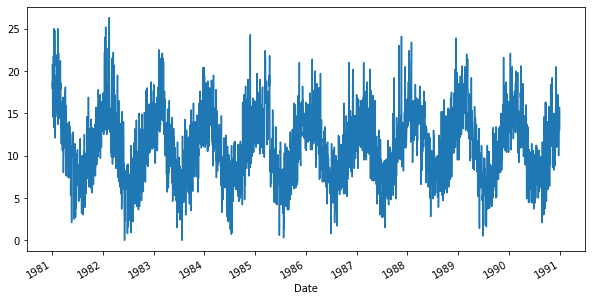

In [ ]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)

pyplot.figure(figsize=(10, 5))
series.plot()
pyplot.show()

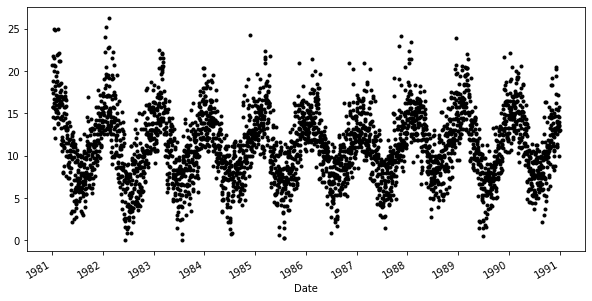

In [ ]:
# create a dot plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
pyplot.figure(figsize=(10, 5))
series.plot(style='k.')
pyplot.show()

* It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.

* The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct compari- son. The example below shows how to do this. First the observations are grouped by year
(series.groupby(Grouper(freq=’A’))).
The groups are then enumerated and the observations for each year are stored as columns
in a new DataFrame. Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.

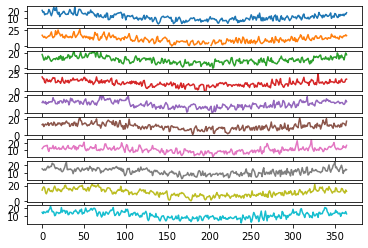

In [ ]:
# create stacked line plots
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv(
    'daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
# pyplot.figure(figsize=(10, 20))
years.plot(subplots=True, legend=False)
pyplot.show()

## Histogram and Density Plot
* Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

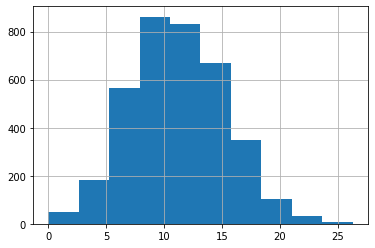

In [ ]:
from matplotlib import pyplot
series = read_csv(
    'daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

* A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.
* Running the example shows a distribution that looks strongly Gaussian

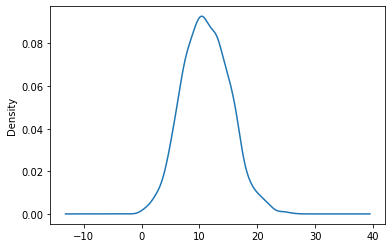

In [ ]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv(
    'daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
pyplot.show()

* We can get a better idea of the shape of the distribution of observations by using a density plot. This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

## Box and Whisker plot by Interval
* Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.
* Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

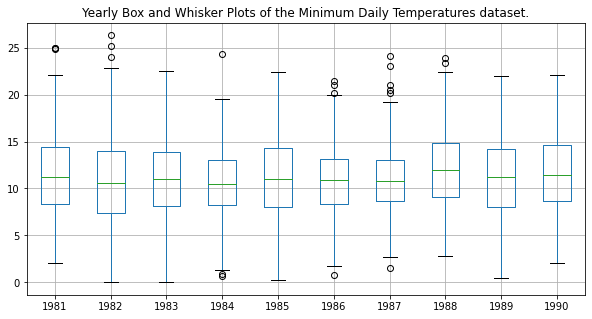

In [ ]:
# create a boxplot of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv(
    '/content/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
pyplot.figure(figsize=(10,5))
pyplot.title('Yearly Box and Whisker Plots of the Minimum Daily Temperatures dataset.')
years.boxplot()
pyplot.show()

* We may also be interested in the distribution of values across months within a year. The example below creates 12 box and whisker plots, one for each month of 1990, the last year in the dataset. In the example, first, only observations from 1990 are extracted. Then, the observations are grouped by month, and each month is added to a new DataFrame as a column. Finally, a box and whisker plot is created for each month-column in the newly constructed DataFrame.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


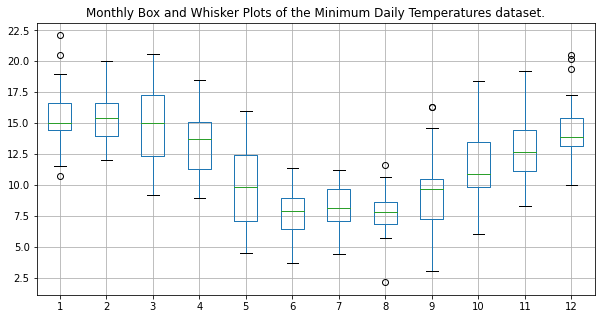

In [ ]:
# create a boxplot of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)


pyplot.figure(figsize=(10,5))
pyplot.title('Monthly Box and Whisker Plots of the Minimum Daily Temperatures dataset.')
months.boxplot()
pyplot.show()

* Running the example creates 12 box and whisker plots, showing the significant change in distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

## Heat Maps
* A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens). Like the box and whisker plots, we can compare observations between intervals using a heat map

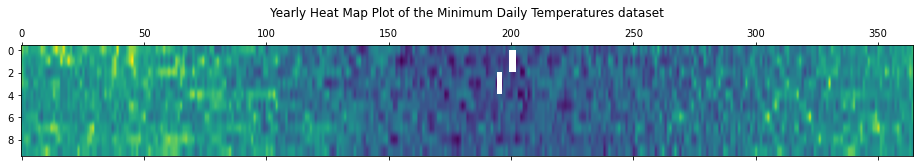

In [ ]:
# create a heat map of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T

pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.title('Yearly Heat Map Plot of the Minimum Daily Temperatures dataset', y=1.2)
pyplot.show()

* The plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.


* As with the box and whisker plot example above, we can also compare the months within a year. Below is an example of a heat map comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

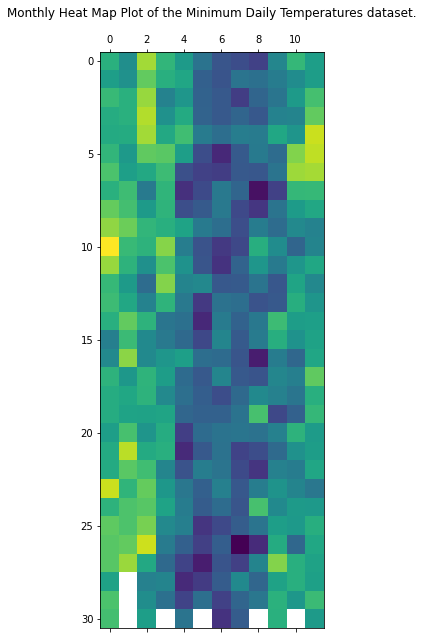

In [ ]:
# create a heat map of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)

# pyplot.figure(figsize=(8, 5))
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.title('Monthly Heat Map Plot of the Minimum Daily Temperatures dataset.')
pyplot.show()

* Running the example shows the same macro trend seen for each year on the zoomed level of month-to-month. We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with
28 days in 1990.


## Lag Scatter Plots
* Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags, with the observation at the previous time step called `lag1`, the observation at two time steps ago `lag=2`, and so on.
* A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.
    * If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
    * If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
    * Either relationship is good as they can be modeled.
* More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.
* A ball in the middle or a spread across the plot suggests a weak or no relationship. Below is an example of a lag plot for the Minimum Daily Temperatures dataset.

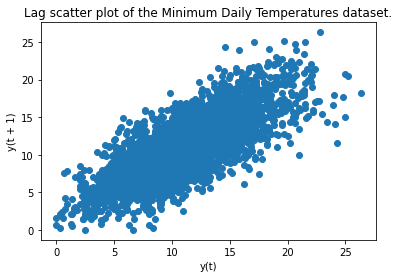

In [ ]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
lag_plot(series)
pyplot.title('Lag scatter plot of the Minimum Daily Temperatures dataset.')
pyplot.show()

* The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

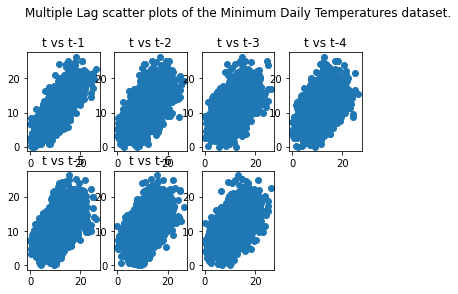

In [ ]:
# create multiple scatter plots
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

pyplot.figure(1)

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.title('Multiple Lag scatter plots of the Minimum Daily Temperatures dataset.', y=2.5)
pyplot.show()

## Autocorrelation Plots
* We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation
* To know more about ACF click [here](https://stackoverflow.com/questions/27541290/bug-of-autocorrelation-plot-in-matplotlib-s-plt-acorr)

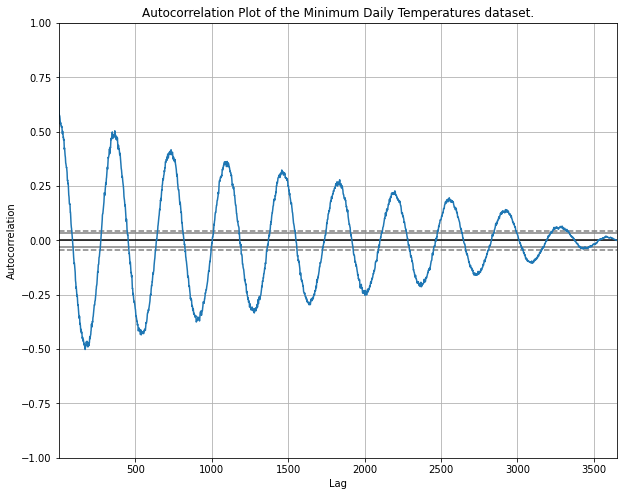

In [ ]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = read_csv(
    'daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(figsize=(10, 8))
pyplot.title('Autocorrelation Plot of the Minimum Daily Temperatures dataset.')
autocorrelation_plot(series)
pyplot.show()

`NOTE :` Sometimes you will not able to create ACF graph it is because of NaN values in dataset. So, you have to take them into account.

* The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen
in this example are a strong sign of seasonality in the dataset.

# Resampling and Interpolation
* You may have observations at the wrong frequency. Maybe they are too granular or not granular enough. The Pandas library in Python provides the capability to change the frequency of your time series data.

## Resampling
* Resampling involves changing the frequency of your time series observations. Two types of resampling are:
    * `Upsampling:`Where you increase the frequency of the samples, such as from minutes to seconds.
    * `Downsampling:` Where you decrease the frequency of the samples, such as from days to months. 
* There are perhaps two main reasons why you may be interested in resampling your time series data:
    * `Problem Framing:`Resampling may be required if your data is not available at the
same frequency that you want to make predictions.
    * `Feature Engineering:`Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.


## Upsampling Data

In [ ]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv(
    'shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
print(upsampled.head(32))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


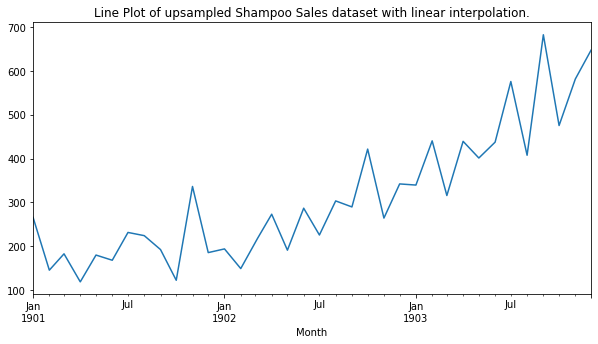

In [ ]:
# upsample to daily intervals with linear interpolation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(
    'shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='linear')
# print(interpolated.head(32))
pyplot.figure(figsize=(10, 5))
pyplot.title('Line Plot of upsampled Shampoo Sales dataset with linear interpolation.')
interpolated.plot()
pyplot.show()

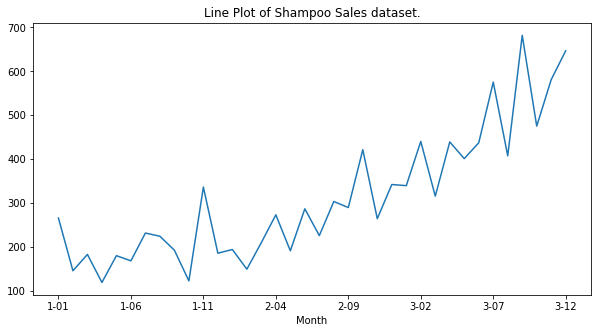

In [ ]:
# plotting of original dataset
# create a line plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/content/shampoo-sales.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)

pyplot.figure(figsize=(10, 5))
pyplot.title('Line Plot of Shampoo Sales dataset.')
series.plot()
pyplot.show()

* Looking at a line plot, we see no difference from plotting the original data as the plot already interpolated the values between points to draw the line.

* Another common interpolation method is to use a polynomial or a spline to connect the values. This creates more curves and can look more natural on many datasets. Using a spline interpolation requires you specify the order (number of terms in the polynomial); in this case, an order of 2 is just fine.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


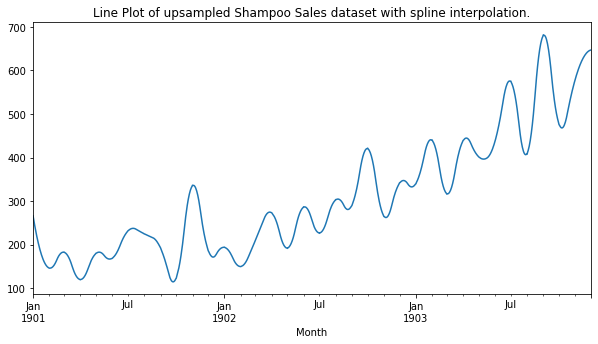

In [ ]:
# upsample to daily intervals with spline interpolation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(
    'shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)
# print(interpolated.head(32))
pyplot.figure(figsize=(10,5))
pyplot.title('Line Plot of upsampled Shampoo Sales dataset with spline interpolation.')
interpolated.plot()
pyplot.show()

* `NOTE:` Interpolation is a useful tool when you have missing observations

## Downsampling Data

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


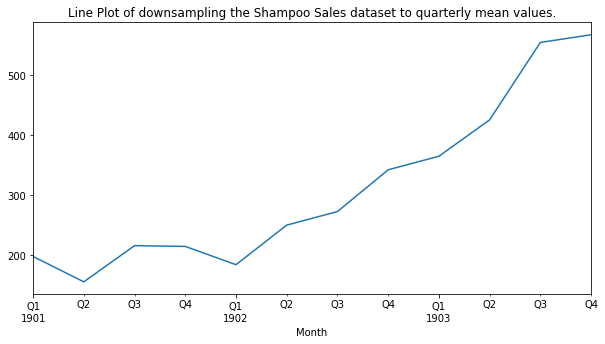

In [ ]:
# downsample to quarterly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(
    'shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())

pyplot.figure(figsize=(10,5))
pyplot.title('Line Plot of downsampling the Shampoo Sales dataset to quarterly mean values.')
quarterly_mean_sales.plot()
pyplot.show()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


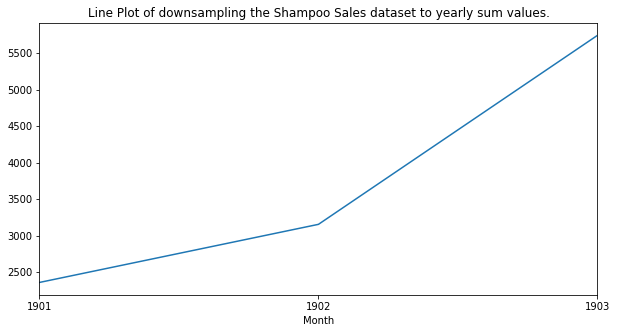

In [ ]:
# downsample to yearly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(
    'shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
resample = series.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())

pyplot.figure(figsize=(10,5))
pyplot.title('Line Plot of downsampling the Shampoo Sales dataset to yearly sum values.')
yearly_mean_sales.plot()
pyplot.show()

# Power Transforms
* Data transforms are intended to remove noise and improve the signal in time series forecasting. It can be very difficult to select a good, or even best, transform for a given prediction problem. There are many transforms to choose from and each has a different mathematical intuition.
* In this section we will discover how to explore different power-based transforms for time series forecasting

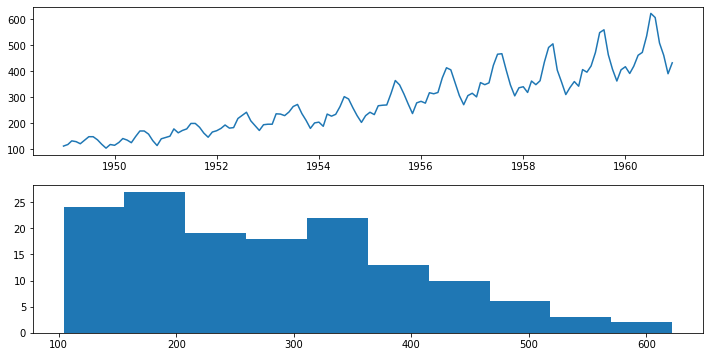

In [ ]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True,
    squeeze=True)
pyplot.figure(figsize=(12, 6))
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

* `Note:`The dataset is non-stationary, meaning that the mean and the variance of the observations change over time. This makes it difficult to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks. This is caused by what appears to be both an increasing trend and a seasonality component.
* In addition, the amount of change, or the variance, is increasing with time. This is clear when you look at the size of the seasonal component and notice that from one cycle to the next, the amplitude (from bottom to top of the cycle) is increasing

## Square Root Transform
* A time series that has a quadratic growth trend can be made linear by taking the square root.
* It is possible that the Airline Passengers dataset shows a quadratic growth. If this is the case, then we could expect a square root transform to reduce the growth trend to be linear and change the distribution of observations to be perhaps nearly Gaussian. The example below
performs a square root of the dataset and plots the results.

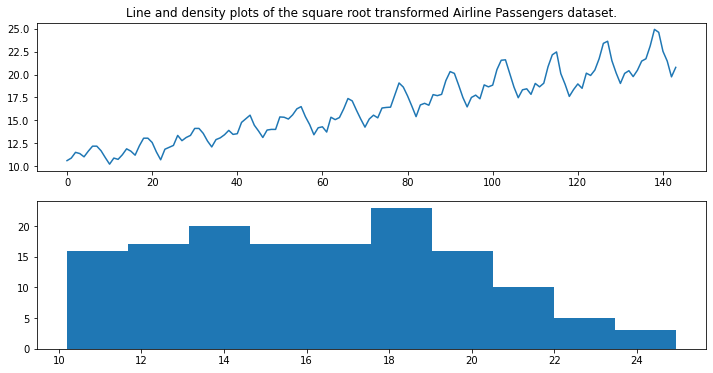

In [ ]:
# square root transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

pyplot.figure(figsize=(12, 6))
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
pyplot.title('Line and density plots of the square root transformed Airline Passengers dataset.')
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

* We can see that the trend was reduced, but was not removed. The line plot still shows an increasing variance from cycle to cycle. The histogram still shows a long tail to the right of the distribution, suggesting an exponential or long-tail distribution.

## Log Transform
* A class of more extreme trends are exponential, often graphed as a hockey stick. Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform.

* Our Airline Passengers dataset has a distribution of this form, but perhaps not this extreme.

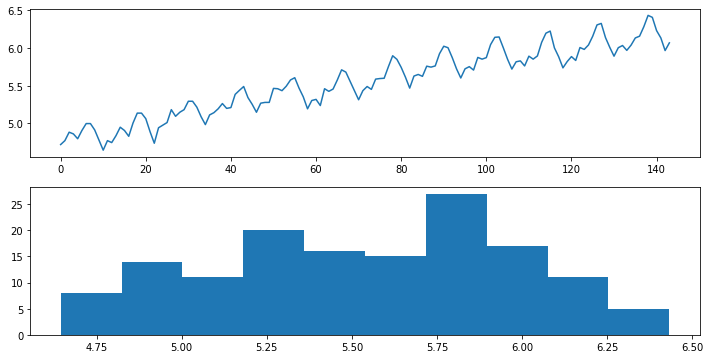

In [ ]:
# log transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])
pyplot.figure(figsize=(12,6))
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers']) # histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

* Running the example results in a trend that does look a lot more linear than the square root transform above. The line plot shows a seemingly linear growth and variance. The histogram also shows a more uniform or squashed Gaussian-like distribution of observations.
* `NOTE:`Log transforms are popular with time series data as they are effective at removing exponential variance. It is important to note that this operation assumes values are positive and non-zero. 

## Box-Cox Transform
* The square root transform and log transform belong to a class of transforms called power transforms. The Box-Cox transform2 is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.
* More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it.
* The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function3 takes an argument, called lambda, that controls the type of transform to perform. Below are some common values for lambda:
    * lambda = -1.0 is a reciprocal transform.
    * lambda = -0.5 is a reciprocal square root transform.
    * lambda = 0.0 is a log transform.
    * lambda = 0.5 is a square root transform.
    * lambda = 1.0 is no transform.

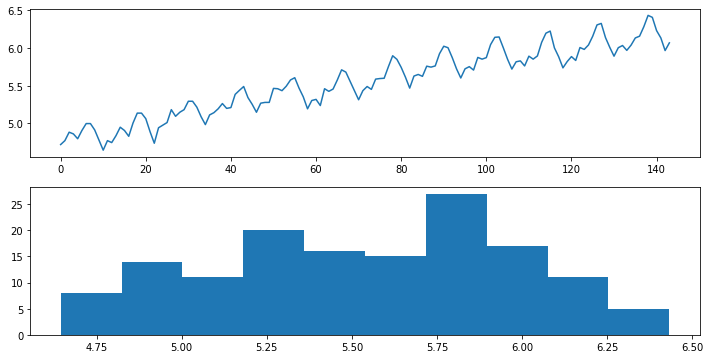

In [ ]:
# manually box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)
pyplot.figure(figsize=(12,6))
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

* 
We can set the lambda parameter to None (the default) and let the function find a statistically tuned value. The following example demonstrates this usage, returning both the transformed dataset and the chosen lambda value.

Lambda: 0.148023


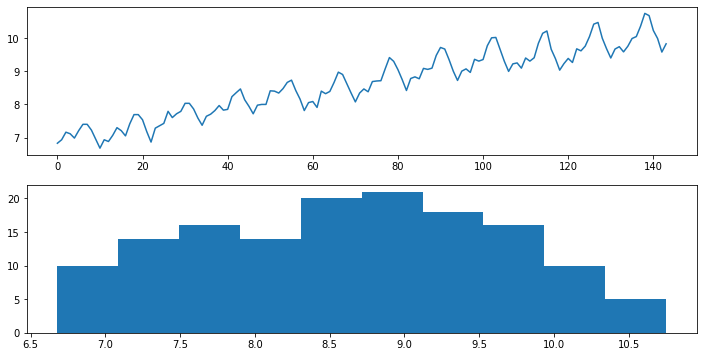

In [ ]:
# automatically box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(figsize=(12,6))
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

* Running the example discovers the lambda value of 0.148023. We can see that this is very close to a lambda value of 0.0, resulting in a log transform and stronger (less than) than 0.5 for the square root transform.

# Moving Average Smoothing
* Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting. Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.
* A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value. The moving part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series. There are two main types of moving average that are used: Centered and Trailing Moving Average.


## Centered Moving Average
* The value at time (t) is calculated as the average of raw observations at, before, and after time (t). For example, a center moving average with a window of 3 would be calculated as:
```
center ma(t) = mean(obs(t − 1), obs(t), obs(t + 1))
```
* This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.


## Trailing Moving Average
* The value at time (t) is calculated as the average of the raw observations at and before the time (t). For example, a trailing moving average with a window of 3 would be calculated as:
```
trail ma(t) = mean(obs(t − 2), obs(t − 1), obs(t))
```
* Trailing moving average only uses historical observations and is used on time series forecasting.



## Data Expectations
* Calculating a moving average of a time series makes some assumptions about your data. It is assumed that both trend and seasonal components have been removed from your time series. This means that your time series is stationary, or does not show obvious trends (long-term increasing or decreasing movement) or seasonality (consistent periodic structure).

## Moving Average as Data Preparation

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


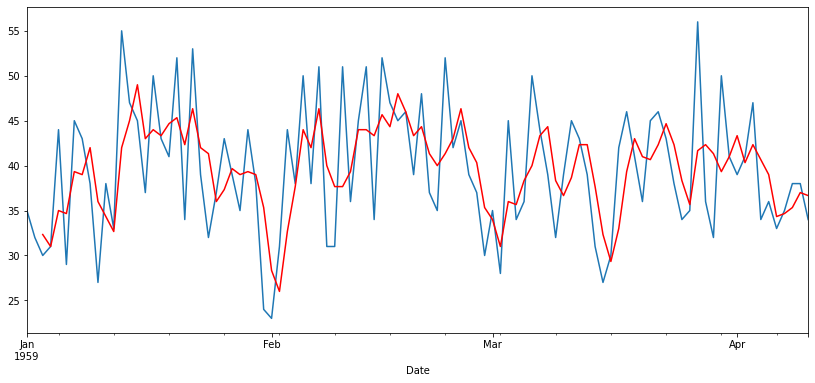

In [ ]:
# moving average smoothing as data preparation
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset series.plot() rolling_mean.plot(color='red') pyplot.show()
# zoomed plot original and transformed dataset
pyplot.figure(figsize=(14,6))
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

## Moving Average as Feature Engineering

In [ ]:
# moving average smoothing as feature engineering
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


## Moving Average as Prediction

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


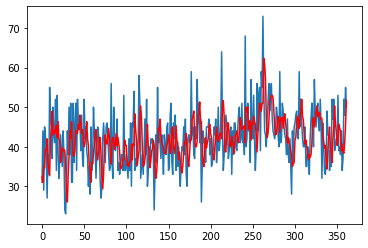

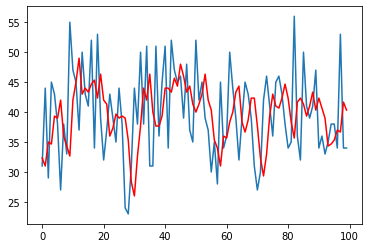

In [ ]:
# moving average smoothing as a forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
    squeeze=True)
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()